In [1]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'SUNPHARMA.NS.csv'
SunPharma=pd.read_csv(FileName)

In [3]:
SunPharma.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1996,1.812932,1.804799,1.803250,1.803250,1.454535,38730
1,02/01/1996,1.800926,1.800926,1.743219,1.743219,1.406113,77460
2,03/01/1996,1.743219,1.750578,1.750578,1.750578,1.412049,12910
3,04/01/1996,1.746705,1.758324,1.742832,1.742832,1.405801,64550
4,05/01/1996,1.738572,1.738572,1.738572,1.738572,1.402365,12910


In [4]:
SunPharma.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6447,23/08/2021,765.000000,770.000000,750.799988,759.349976,759.349976,2375417
6448,24/08/2021,759.799988,777.950012,754.250000,771.349976,771.349976,2732537
6449,25/08/2021,770.000000,776.000000,759.599976,769.049988,769.049988,2254852
6450,26/08/2021,765.150024,771.099976,759.250000,760.549988,760.549988,1735864
6451,27/08/2021,760.750000,777.000000,758.099976,771.799988,771.799988,2432862


In [5]:
df1=SunPharma.reset_index()['Close']

In [6]:
df1.shape

(6452,)

In [7]:
df1

0         1.803250
1         1.743219
2         1.750578
3         1.742832
4         1.738572
           ...    
6447    759.349976
6448    771.349976
6449    769.049988
6450    760.549988
6451    771.799988
Name: Close, Length: 6452, dtype: float64

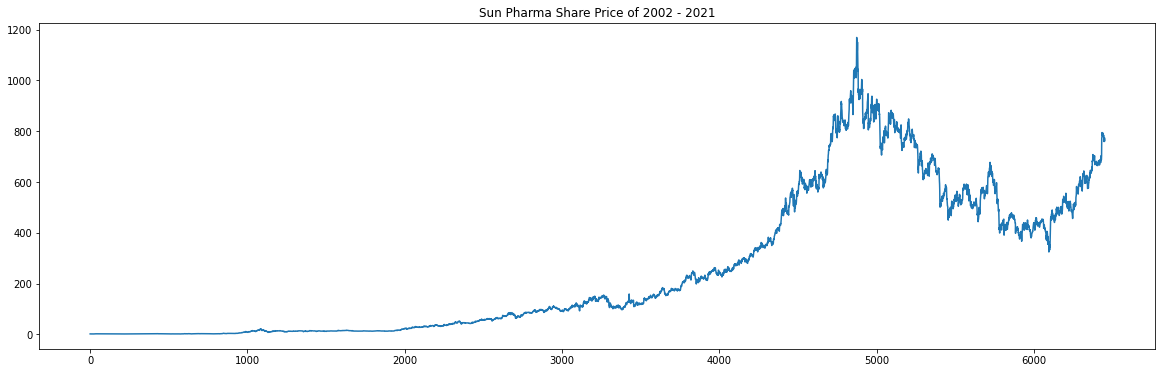

In [8]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,6)) 
plt.title('Sun Pharma Share Price of 2002 - 2021')
plt.plot(df1)

In [9]:
SunPharma.Date = pd.to_datetime(SunPharma.Date)
SunPharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6452 entries, 0 to 6451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6452 non-null   datetime64[ns]
 1   Open       6452 non-null   float64       
 2   High       6452 non-null   float64       
 3   Low        6452 non-null   float64       
 4   Close      6452 non-null   float64       
 5   Adj Close  6452 non-null   float64       
 6   Volume     6452 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 353.0 KB


In [10]:
SunPharma = SunPharma.set_index('Date')

In [11]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     | 306 kB 2.7 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=5a9acdcf0b92d2f79496e2eba40fe0e7356a7ac1123ac9d7a1ef0c4535be4ba0
  Stored in directory: /tmp/pip-ephem-wheel-cache-fi6cov2p/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [12]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 693 kB/s 


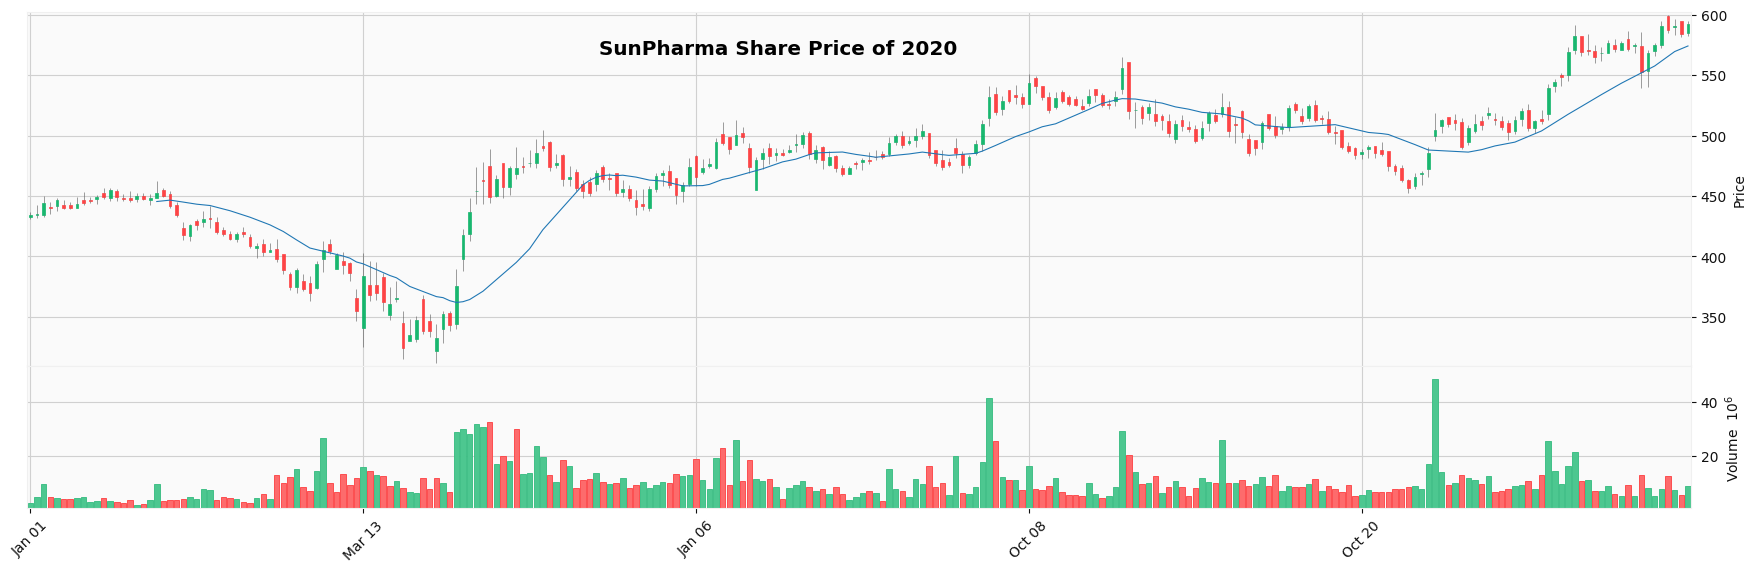

In [13]:
import mplfinance as mpf
mpf.plot(SunPharma['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'SunPharma Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[2.30832134e-04],
       [1.79425446e-04],
       [1.85727221e-04],
       ...,
       [6.57251591e-01],
       [6.49972738e-01],
       [6.59606514e-01]])

In [17]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size, test_size

(4839, 1613)

In [19]:
len(train_data), len(test_data)

(4839, 1613)

In [20]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(X_train)

[[2.30832134e-04 1.79425446e-04 1.85727221e-04 ... 5.72768684e-04
  5.57180806e-04 5.40598722e-04]
 [1.79425446e-04 1.85727221e-04 1.79094045e-04 ... 5.57180806e-04
  5.40598722e-04 4.77583548e-04]
 [1.85727221e-04 1.79094045e-04 1.75446055e-04 ... 5.40598722e-04
  4.77583548e-04 4.35795223e-04]
 ...
 [7.38988842e-01 7.33294189e-01 7.41986017e-01 ... 7.84588717e-01
  7.94308107e-01 8.04712606e-01]
 [7.33294189e-01 7.41986017e-01 7.35477886e-01 ... 7.94308107e-01
  8.04712606e-01 8.19869758e-01]
 [7.41986017e-01 7.35477886e-01 7.34535886e-01 ... 8.04712606e-01
  8.19869758e-01 8.20383538e-01]]


In [23]:
print(X_train.shape), print(y_train.shape)

(4738, 100)
(4738,)


(None, None)

In [24]:
print(X_test.shape), print(y_test.shape)

(1512, 100)
(1512,)


(None, None)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
75/75 [==============================] - 22s 218ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 2/100
75/75 [==============================] - 15s 198ms/step - loss: 1.2120e-04 - val_loss: 0.0015
Epoch 3/100
75/75 [==============================] - 15s 199ms/step - loss: 1.2638e-04 - val_loss: 0.0020
Epoch 4/100
75/75 [==============================] - 15s 198ms/step - loss: 1.2026e-04 - val_loss: 8.6345e-04
Epoch 5/100
75/75 [==============================] - 15s 201ms/step - loss: 1.1903e-04 - val_loss: 0.0012
Epoch 6/100
75/75 [==============================] - 15s 202ms/step - loss: 1.2473e-04 - val_loss: 0.0010
Epoch 7/100
75/75 [==============================] - 15s 203ms/step - loss: 1.2631e-04 - val_loss: 7.8476e-04
Epoch 8/100
75/75 [==============================] - 15s 200ms/step - loss: 1.1267e-04 - val_loss: 0.0012
Epoch 9/100
75/75 [==============================] - 15s 200ms/step - loss: 1.0364e-04 - val_loss: 8.0309e-04
Epoch 10/100
75/75 [==================

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.6.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

234.89393075230325

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

605.1051951298307

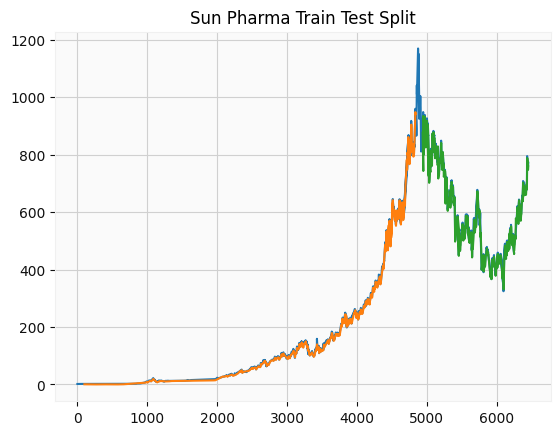

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Sun Pharma Train Test Split')
plt.show()

In [37]:
len(test_data)

1613

In [41]:
x_input=test_data[1513:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.65531963]
101
1 day input [0.53000013 0.53051391 0.52469084 0.54395839 0.52905813 0.53590881
 0.54096122 0.5519223  0.54729812 0.55115163 0.54669867 0.544986
 0.54220291 0.54609923 0.54965304 0.55059499 0.55911554 0.56318314
 0.55115163 0.58390647 0.58048113 0.58052393 0.59658023 0.60505792
 0.60056216 0.59079996 0.58711773 0.59024332 0.60103318 0.58686079
 0.58990082 0.59037179 0.59478189 0.60137569 0.59769345 0.57221747
 0.57097577 0.57333069 0.57881126 0.5771414  0.57581409 0.57701293
 0.57992449 0.57487209 0.57761237 0.58210813 0.57851151 0.57517184
 0.57118985 0.56819268 0.57114705 0.57358758 0.56969127 0.56836396
 0.5679786  0.57435831 0.57782646 0.57893968 0.57709859 0.58454872
 0.58206533 0.58116619 0.57521464 0.58108052 0.56977693 0.57063327
 0.57118985 0.58356392 0.58609012 0.58356392 0.58835938 0.58891601
 0.57795493 0.58724615 0.59298361 0.60103318 0.58810248 0.58767432
 0.60069063 0.66144766 0.6623468  0.67930223 0.67155241 0.67189496
 0.67108143 0.67416422 0.67806054 0

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

6452

Text(0.5, 1.0, 'Sun Pharma Prediction of Next 30 Days')

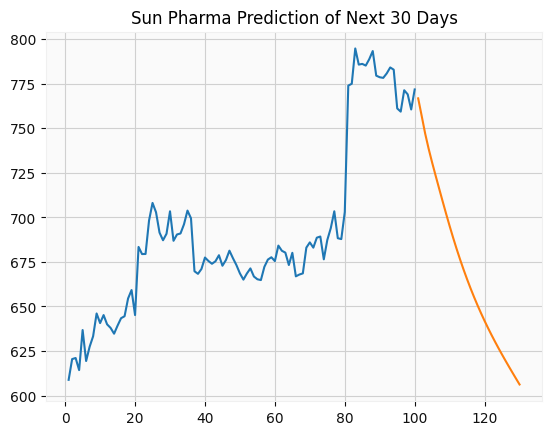

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[6352:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Sun Pharma Prediction of Next 30 Days')

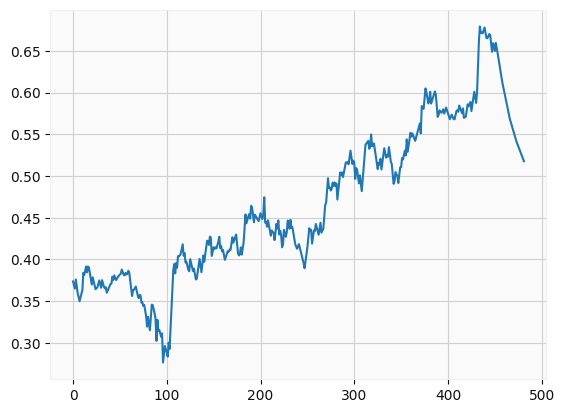

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

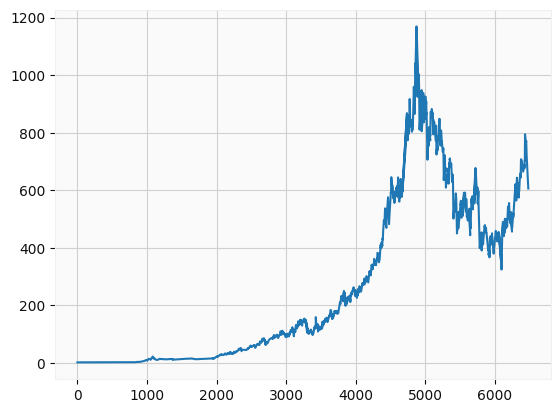

In [50]:
plt.plot(df3)